# Data analysis of Churn in telecomunication company

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
telecom = pd.read_csv("C:\\Users\\34609\\Documents\\Repos Git\\Data\\telecom_churn.csv")
telecom.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


Let’s have a look at data dimensionality, feature names, and feature types.

In [3]:
print("Telecom dimensions: ", telecom.shape) #obtention of # of (rows,columns)
telecom.info() #gives general information about the variables. Data type, # of null values, column name [as in telecom.columns]

Telecom dimensions:  (3333, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total ni


The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [4]:
telecom.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
telecom.describe(include = ("object", "bool")) #for no numeric data, specification of data-type is needed

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


Let's count the number of users that churned

In [6]:
telecom["Churn"].value_counts() #483 people churned

False    2850
True      483
Name: Churn, dtype: int64

In [7]:
round(telecom["Churn"].value_counts(normalize = True) * 100, 0) #What represents a 14%

False    86.0
True     14.0
Name: Churn, dtype: float64


## Sorting

A DataFrame can be sorted by the value of one of the variables, columns in this case, for example, we can sort by *Total day charge*.


In [8]:
sorted_1_column = telecom.sort_values(by = "Total day charge", ascending = True) #sort by 1 column
sorted_1_column.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1345,SD,98,415,No,No,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,True
1397,VT,101,510,No,No,0,0.0,0,0.00,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,False
2736,OK,127,510,No,Yes,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,False


In [9]:
sorted_2_columns = telecom.sort_values(by = ["Churn", "Total day charge"], ascending = False) #sort by multiple columns
sorted_2_columns.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,True
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,True



## Indexing and retrieving data

A DataFrame can be indexed in a few different ways. Use indexing for answering this question:
 **What is mean value for "Total day minutes" register in our dataframe?**



In [10]:
print("The average total minutes a day is ",round(telecom["Total day minutes"].mean(), 1), ".")

The average total minutes a day is  179.8 .


### Boolean indexing 

The result of such indexing is the applying of the method only in the rows that satisfy the specify condition for the column. Let’s use it to answer the question:

**What are average values of numerical features for churned users?**


In [11]:
telecom[telecom["Churn"] == 1].mean() #all average data for numerical features

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

**How much time (on average) do churned users spend on the phone during daytime?**

In [12]:
round(telecom[telecom["Churn"] == 1]["Total day minutes"].mean(), 1)

206.9


**What is the maximum length of international calls among loyal users who do not have an international plan?**



In [13]:
round(telecom[(telecom["Churn"] == 0) & (telecom["International plan"] == "No")]["Total day minutes"].max(), 1)

315.6

DataFrames can be indexed by column or by row. The `loc` method is used for **indexing by name**, while `iloc()` is used for **indexing by number**.

Obtain the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)" 


In [14]:
telecom.loc[0:5, "State":"Area code"] #doble condition in the .loc first the rows from 0 to 5 and the columns from State to Area code

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


Obtain the values of the first five rows in the first three columns"

In [15]:
telecom.iloc[0:5, 0:3] #indexing rows and columns by number NOT by name like in the previous example so using .iloc

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


Obtain the last line of the data frame:

In [16]:
telecom.tail(1) #is also posible to do a telecom[-1:] obtaining the same result

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,False


## Applying Functions to Cells, Columns and Rows

In [17]:
telecom.apply(np.max) #applying the np.max function to all the columns of the DF

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes           20
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                      True
dtype: object

Select all states starting with W using a lambda function and the apply method.

In [18]:
state_w = telecom["State"].apply(lambda state: state[0] == 'W') #comprobation of wheter if "State" column starts with W or not
telecom[state_w].head(3) #construction of DF only with "State"s starting with W

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,False
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,False


The `map` & `replace` methods can be used to **change values of a variable in a column** by passing a dictionary with the form `{old_value: new_value}`. Do the 'No' to False and 'Yes' to True  transformation in the International Plan & Voice mail plan columns.

In [19]:
changes = {"Yes": "True", "No":"False"} #creation of dictionary
telecom["International plan"] = telecom["International plan"].map(changes) #method 1
telecom["Voice mail plan"] = telecom["Voice mail plan"].replace(changes) #method 2
telecom.head(5) #checking tranformation

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Grouping

In general, grouping data in Pandas works as follows: 
```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```

1. First, the `groupby` method divides the `grouping_columns` by their values. They become a new index in the resulting dataframe.
2. Then, columns of interest are selected (`columns_to_show`). If `columns_to_show` is not included, all non groupby clauses will be included.
3. Finally, one or several functions are applied to the obtained groups per selected columns.

Group the data according to the values of the `Churn` variable and display statistics of three columns in each group:

In [20]:
telecom.groupby(by = "Churn")["Total day minutes", "Total eve minutes", "Total night minutes"].describe()

Total day minutes                                                      \
                  count        mean        std  min      25%    50%     75%   
Churn                                                                         
False            2850.0  175.175754  50.181655  0.0  142.825  177.2  210.30   
True              483.0  206.914079  68.997792  0.0  153.250  217.6  265.95   

             Total eve minutes              ...                 \
         max             count        mean  ...     75%    max   
Churn                                       ...                  
False  315.6            2850.0  199.043298  ...  233.20  361.8   
True   350.8             483.0  212.410145  ...  249.45  363.7   

      Total night minutes                                               \
                    count        mean        std   min     25%     50%   
Churn                                                                    
False              2850.0  200.133193  51.105032  23.2  165.90  200.25   
True                483.0  205.231677  47.132825  47.4  171.25  204.80   

                      
          75%    max  
Churn                 
False  234.90  395.0  
True   239.85  354.9  

[2 rows x 24 columns]

In [23]:
telecom.groupby(by = "Churn")["Total day minutes", "Total eve minutes", "Total night minutes"].agg([np.mean, np.median, np.max, np.min])

Total day minutes                    Total eve minutes                \
                   mean median   amax amin              mean median   amax   
Churn                                                                        
False        175.175754  177.2  315.6  0.0        199.043298  199.6  361.8   
True         206.914079  217.6  350.8  0.0        212.410145  211.3  363.7   

            Total night minutes                       
       amin                mean  median   amax  amin  
Churn                                                 
False   0.0          200.133193  200.25  395.0  23.2  
True   70.9          205.231677  204.80  354.9  47.4


## DataFrame transformations

Like many other things in Pandas, adding columns to a DataFrame is doable in many ways.

For example, if we want to calculate the total number of calls for all users, let’s create the `total_calls` Series and paste it into the DataFrame:



In [29]:
total_calls = telecom["Total day calls"] + telecom["Total eve calls"] + telecom["Total night calls"] + telecom["Total intl calls"]
telecom.insert(loc = len(telecom.columns), column = "Total calls", value = total_calls)
telecom.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,333


To delete columns or rows, use the `drop` method, passing the indexes and the `axis` parameter (`1` if columns and nothing or `0` if rows). The `inplace` argument tells whether to change the original DataFrame. 

In [30]:
telecom.drop(["Total calls"], axis = 1, inplace = True)
telecom.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


# Attempt at predicting telecom churn
Let's see how churn rate is related to the *International plan* feature. We’ll do this using a `crosstab` contingency table and also through visual analysis with `Seaborn`. Let's creat a crosstab table with `Churn` and `International plan`


In [24]:
pd.crosstab(telecom["Churn"], telecom["International plan"])

International plan,False,True
Churn,,
False,2664,186
True,346,137


In [25]:
#Imports to plotting modules 
import matplotlib.pyplot as plt
import seaborn as sns

Create a count plot with `International plan` as x serie and `Churn` as hue

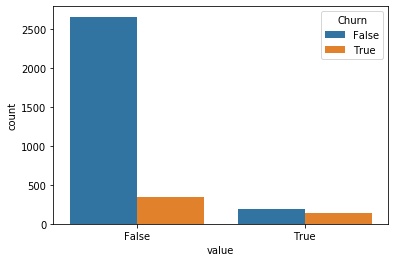

In [35]:
churn_predict1 = pd.melt(frame = telecom, value_vars = ["International plan"], id_vars = ["Churn"])
sns.countplot(data = churn_predict1, x = "value", hue = "Churn");


We see that, with *International Plan*, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

Next, let’s look at another important feature – *Customer service calls*. Let’s also make a summary table and a picture.

In [34]:
pd.crosstab(telecom["Churn"], telecom["Customer service calls"])

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0
True,92,122,87,44,76,40,14,5,1,2


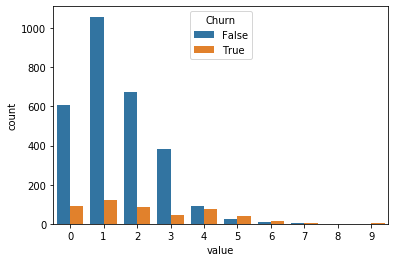

In [36]:
churn_predict1 = pd.melt(frame = telecom, value_vars = ["Customer service calls"], id_vars = ["Churn"])
sns.countplot(data = churn_predict1, x = "value", hue = "Churn");

Although it's not so obvious from the summary table, it's easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above. 


Author: [Yury Kashnitskiy](https://yorko.github.io). Translated and edited by [Christina Butsko](https://www.linkedin.com/in/christinabutsko/), [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina), Sergey Isaev and [Artem Trunov](https://www.linkedin.com/in/datamove/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.